<a href="https://colab.research.google.com/github/amitknsingh/Hello-world/blob/master/Case_study_2_Fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model 
import os
import numpy as np 
import matplotlib.pyplot as plt 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation 

In [ ]:
# in keras there are inbuilt datasets ---> fashion mnist datast---> download the dataset 

fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train = X_train.reshape((60000,28,28,1))
X_test = X_test.reshape((10000,28,28,1))

In [ ]:
X_train = X_train/255.0 # 0-255 
X_test = X_test/255.0

In [ ]:
img_width=28
img_height=28

input_shape=(img_width,img_height,1)

In [ ]:
model = models.Sequential()

In [ ]:
conv1 = layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1) ) # 64/128/256--> thumb rule 
conv2 = layers.Conv2D(128, (3,3), activation='relu')
max_pool = layers.MaxPooling2D((2,2))

flat_layer = layers.Flatten()

fc1 = layers.Dense(64, activation='relu')
fc2 = layers.Dense(64, activation='relu')

output = layers.Dense(10, 'softmax')




In [ ]:
model.add(conv1)
model.add(conv2)
model.add(max_pool)
model.add(flat_layer)
model.add(fc1)
model.add(fc2)
model.add(output)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 128)      0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 64)                1179712   
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                        

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train , epochs = 200, batch_size = 64, validation_split = 0.2 )

Epoch 1/200
750/750 [==============================] - 26s 17ms/step - loss: 0.4451 - accuracy: 0.8428 - val_loss: 0.3001 - val_accuracy: 0.8937
Epoch 2/200
750/750 [==============================] - 13s 17ms/step - loss: 0.2717 - accuracy: 0.9005 - val_loss: 0.2702 - val_accuracy: 0.9013
Epoch 3/200
750/750 [==============================] - 13s 17ms/step - loss: 0.2165 - accuracy: 0.9200 - val_loss: 0.2314 - val_accuracy: 0.9147
Epoch 4/200
750/750 [==============================] - 13s 17ms/step - loss: 0.1760 - accuracy: 0.9342 - val_loss: 0.2415 - val_accuracy: 0.9147
Epoch 5/200
750/750 [==============================] - 12s 16ms/step - loss: 0.1430 - accuracy: 0.9471 - val_loss: 0.2361 - val_accuracy: 0.9181
Epoch 6/200
750/750 [==============================] - 12s 16ms/step - loss: 0.1155 - accuracy: 0.9575 - val_loss: 0.2637 - val_accuracy: 0.9119
Epoch 7/200
750/750 [==============================] - 12s 16ms/step - loss: 0.0917 - accuracy: 0.9659 - val_loss: 0.2691 - val_ac

KeyboardInterrupt: ignored

In [ ]:
# how do you save the model trained : deploy this model anywhere we want to us  
import tempfile
model_directory = tempfile.gettempdir()
print(model_directory)
version =1 
export_path = os.path.join(model_directory,str(version))
print(export_path)

/tmp
/tmp/1


In [ ]:
if os.path.isdir(export_path):
  print('\n Already the path contains a saved model, cleaning up \n')
  !rm -r {export_path}
model.save(export_path, save_format = "tf")

INFO:tensorflow:Assets written to: /tmp/1/assets


In [ ]:
# in tensorflow keras the model is saved as a pb file 

In [ ]:
# suppose you have saved your model in your server---> I am a client of yours 
# How do I access your model ? 
# i want to infer from a website your model 

# Basically we will have to create a server (of the model)

In [ ]:
!saved_model_cli show --dir {export_path} --all`


MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['conv2d_input'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 28, 28, 1)
        name: serving_default_conv2d_input:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['dense_2'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 10)
        name: StatefulPartitionedCall:0
  Method name is: tensorflow/serving/predict

Defined Functions:
  Function Name: '__call__'
    Option #1
      Callable with:
        Argument #1
          conv2d_i

In [ ]:
!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | apt-key add -
!apt update

deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0   4392      0 --:--:-- --:--:-- --:--:--  4385
OK
Get:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:4 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:5 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:6 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Hit:7 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:9 https://cloud.r-project.org/bin/linux/ub

In [ ]:
# we are going to serve our model using package tensorflow serving ---> 

In [ ]:
!apt-get install tensorflow-model-server

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tensorflow-model-server
0 upgraded, 1 newly installed, 0 to remove and 58 not upgraded.
Need to get 335 MB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable/tensorflow-model-server amd64 tensorflow-model-server all 2.7.0 [335 MB]
Fetched 335 MB in 11s (29.6 MB/s)
Selecting previously unselected package tensorflow-model-server.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../tensorflow-model-server_2.7.0_all.deb ...
Unpacking tensorflow-model-server (2.7.0) ...
Setting up tensorflow-model-server (2.7.0) ...


In [ ]:
os.environ["Model_Directory"] = model_directory

In [ ]:
%%bash --bg 

nohup tensorflow_model_server \
  --rest_api_port=8501 \
  --model_name=Fashion_MNIST_Model \
  --model_base_path="${Model_Directory}" >server.log 2>&1

Starting job # 0 in a separate thread.


In [ ]:
!tail server.log

[warn] getaddrinfo: address family for nodename not supported
[evhttp_server.cc : 245] NET_LOG: Entering the event loop ...


In [ ]:
import json 

data = json.dumps({"signature_name": "serving_default", "instances": X_test[4:7].tolist()}) #assignment 
print(data)

{"signature_name": "serving_default", "instances": [[[[0.0], [0.0], [0.0], [0.00784313725490196], [0.0], [0.00392156862745098], [0.00392156862745098], [0.0], [0.0], [0.0], [0.0], [0.2235294117647059], [0.2627450980392157], [0.28627450980392155], [0.2980392156862745], [0.2980392156862745], [0.3254901960784314], [0.24313725490196078], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.00392156862745098], [0.00392156862745098], [0.00392156862745098], [0.0], [0.0], [0.050980392156862744], [0.30980392156862746], [0.5019607843137255], [0.788235294117647], [0.6352941176470588], [0.6313725490196078], [0.6784313725490196], [0.7529411764705882], [0.6745098039215687], [0.7098039215686275], [0.7215686274509804], [0.4235294117647059], [0.11764705882352941], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.00392156862745098], [0.0], [0.0], [0.4], [0.5450980392156862], [0.5568627450980392], [0.403921568627451], [0.450980392

In [ ]:
!pip install -q requests

In [ ]:
import requests

In [ ]:
def show(idx, title):
  plt.figure()
  plt.imshow(X_test[idx].reshape(28,28))
  plt.title('\n\n{}'.format(title), fontdict={'size': 16})

[[3.08734863e-13, 0.0, 1.28117687e-24, 8.42580346e-36, 4.42945424e-17, 0.0, 1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.76290215e-11, 0.0, 1.0, 0.0, 2.54824327e-33, 0.0, 0.0, 0.0]]


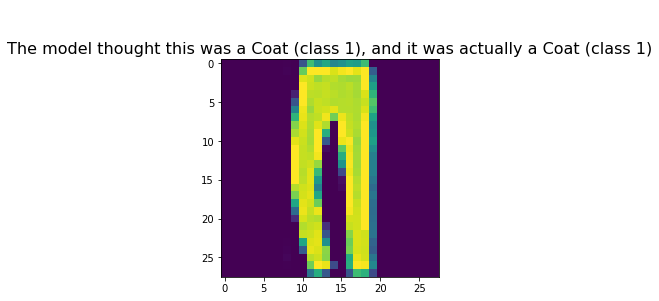

In [ ]:
import os 
headers = {"content-type": "application/json"}
# 192.1.0.1
json_response = requests.post('http://localhost:8501/v1/models/Fashion_MNIST_Model:predict', data=data, headers=headers)

predictions = json.loads(json_response.text)['predictions']
print(predictions)
show(2,'The model thought this was a {} (class {}), and it was actually a {} (class {})'.format(
  class_names[np.argmax(predictions[2])], y_test[2], class_names[np.argmax(predictions[2])], y_test[2]) )

In [ ]:
# working break---> 10:22---> 10:37

# this week---> individually spend time---> next week---> 